In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import pickle

import matplotlib
import matplotlib.colors as colors


In [2]:
with open("../ACC_particle_experiments/analysis/diffusivityDict_lattice.pickle", "rb") as pickFile:
    diffDict = pickle.load(pickFile)

In [3]:
pd.DataFrame(diffDict)

,fine_advection,coarsened_advection,coarsened_EM_Le_Sommer_C0.3,coarsened_EM_Le_Sommer_C1,coarsened_EM_Le_Sommer_C3,coarsened_EM_Redi_smallslope_K1500,coarsened_EM_Redi_smallslope_K5000,coarsened_EM_Redi_smallslope_K15000,coarsened_M1_Redi_smallslope_K15000,coarsened_Markov1_K1500,...,coarse_advection,coarse_EM_Le_Sommer_C0.3,coarse_EM_Le_Sommer_C1,coarse_EM_Le_Sommer_C3,coarse_EM_Redi_smallslope_K1500,coarse_EM_Redi_smallslope_K5000,coarse_EM_Redi_smallslope_K15000,coarse_Markov1_K1500,coarse_Markov1_K5000,coarse_Markov1_K15000
full,"{'diffusivityAvg': 0.0004204509930741575, 'dif...","{'diffusivityAvg': 0.0003799480602404779, 'dif...","{'diffusivityAvg': 0.0008601085776760401, 'dif...","{'diffusivityAvg': 0.0016140474054354916, 'dif...","{'diffusivityAvg': 0.005033770678711756, 'diff...","{'diffusivityAvg': 0.0009204090425576539, 'dif...","{'diffusivityAvg': 0.0031107693014045066, 'dif...","{'diffusivityAvg': 0.013512051736911248, 'diff...","{'diffusivityAvg': 0.013438880533886744, 'diff...","{'diffusivityAvg': 0.0006197310281907481, 'dif...",...,"{'diffusivityAvg': 2.5783392301386567e-05, 'di...","{'diffusivityAvg': 0.00036196695459205424, 'di...","{'diffusivityAvg': 0.0005175550709057841, 'dif...","{'diffusivityAvg': 0.0011318001089279052, 'dif...","{'diffusivityAvg': 0.0006079944009376718, 'dif...","{'diffusivityAvg': 0.0018042669440439638, 'dif...","{'diffusivityAvg': 0.003647486691286124, 'diff...","{'diffusivityAvg': 0.0002609613775779018, 'dif...","{'diffusivityAvg': 0.00031733709137542226, 'di...","{'diffusivityAvg': 9.959314449336863e-05, 'dif..."
top,"{'diffusivityAvg': 0.0010655693961792118, 'dif...","{'diffusivityAvg': 0.0009315556786039768, 'dif...","{'diffusivityAvg': 0.001777259988588388, 'diff...","{'diffusivityAvg': 0.002559790173692195, 'diff...","{'diffusivityAvg': 0.005293422227771238, 'diff...","{'diffusivityAvg': 0.0014118891521728925, 'dif...","{'diffusivityAvg': 0.0024247880933566607, 'dif...","{'diffusivityAvg': 0.005171284915748312, 'diff...","{'diffusivityAvg': 0.005065010432580571, 'diff...","{'diffusivityAvg': 0.0012753275384500893, 'dif...",...,"{'diffusivityAvg': 1.4798515494714565e-05, 'di...","{'diffusivityAvg': 0.0006101015805246749, 'dif...","{'diffusivityAvg': 0.0008420563061157741, 'dif...","{'diffusivityAvg': 0.0020821176450903697, 'dif...","{'diffusivityAvg': 0.0017579386868782063, 'dif...","{'diffusivityAvg': 0.005783606066102108, 'diff...","{'diffusivityAvg': 0.007733393148946916, 'diff...","{'diffusivityAvg': 0.0005666295376169747, 'dif...","{'diffusivityAvg': 0.0009421210461273175, 'dif...","{'diffusivityAvg': 0.00038509736408221554, 'di..."
center,"{'diffusivityAvg': 0.0002130522120629317, 'dif...","{'diffusivityAvg': 0.00019422958670583162, 'di...","{'diffusivityAvg': 0.0005798134784053575, 'dif...","{'diffusivityAvg': 0.0012315054038360607, 'dif...","{'diffusivityAvg': 0.003939003965822463, 'diff...","{'diffusivityAvg': 0.0006838399631415831, 'dif...","{'diffusivityAvg': 0.0024276687694869304, 'dif...","{'diffusivityAvg': 0.012228500051313505, 'diff...","{'diffusivityAvg': 0.012100777193434048, 'diff...","{'diffusivityAvg': 0.0004450337024747051, 'dif...",...,"{'diffusivityAvg': 2.3642256121916588e-05, 'di...","{'diffusivityAvg': 0.00023505347450065937, 'di...","{'diffusivityAvg': 0.0003998021710068761, 'dif...","{'diffusivityAvg': 0.0008798078326111765, 'dif...","{'diffusivityAvg': 0.00024699154705757763, 'di...","{'diffusivityAvg': 0.0007372846479408138, 'dif...","{'diffusivityAvg': 0.0024871655646656566, 'dif...","{'diffusivityAvg': 0.00012880826085160928, 'di...","{'diffusivityAvg': 0.00010714482108330226, 'di...","{'diffusivityAvg': 1.541049109464683e-05, 'dif..."
deep,"{'diffusivityAvg': 0.00019260830001189462, 'di...","{'diffusivityAvg': 0.00017074252522474218, 'di...","{'diffusivityAvg': 0.0006010789953351211, 'dif...","{'diffusivityAvg': 0.0015391701990944073, 'dif...","{'diffusivityAvg': 0.006170722722125893, 'diff...","{'diffusivityAvg': 0.0008997345624442612, 'dif...",

In [4]:
df = pd.DataFrame(index=diffDict.keys(), columns=['full', 'top', 'center', 'deep'])

for run in diffDict.keys():
    for depth in df.columns:
        df[depth][run] = diffDict[run][depth]['diffusivityAvg']

In [5]:
df = df.rename(columns={
    "full": "All depths",
    "top": "-200 ≥ z > -600",
    "center": "-600 ≥ z > -1200",
    "deep": "-1200 ≥ z ≥ -1600"
})

In [6]:
df_coarsened = df[:12]
df_coarse = df[12:]

In [7]:
df_coarsened = df_coarsened.rename(index={
    'fine_advection':'Fine advection', 
    'coarsened_advection':'Coarsened advection' ,
    'coarsened_EM_Le_Sommer_C0.3': 'Markov-0 + LS, C=0.3',
    'coarsened_EM_Le_Sommer_C1': 'Markov-0 + LS, C=1', 
    'coarsened_EM_Le_Sommer_C3':'Markov-0 + LS, C=3',
    'coarsened_EM_Redi_smallslope_K1500': r'Markov-0, $\kappa$=1500',
    'coarsened_EM_Redi_smallslope_K5000': r'Markov-0, $\kappa$=5000',
    'coarsened_EM_Redi_smallslope_K15000': r'Markov-0, $\kappa$=15000',
    'coarsened_M1_Redi_smallslope_K15000': r'Markov-0 M1, $\kappa$=15000', 
    'coarsened_Markov1_K1500': r'Markov-1, $\kappa$=1500',
    'coarsened_Markov1_K5000': r'Markov-1, $\kappa$=5000', 
    'coarsened_Markov1_K15000': r'Markov-1, $\kappa$=15000'
})
df_coarsened = df_coarsened.reindex(['Fine advection', 'Coarsened advection', 
                                     r'Markov-0, $\kappa$=1500', r'Markov-0, $\kappa$=5000',
       r'Markov-0, $\kappa$=15000', r'Markov-0 M1, $\kappa$=15000','Markov-0 + LS, C=0.3', 'Markov-0 + LS, C=1',
       'Markov-0 + LS, C=3', 
       r'Markov-1, $\kappa$=1500', r'Markov-1, $\kappa$=5000',
       r'Markov-1, $\kappa$=15000'])

In [8]:
df_coarse = df_coarse.rename(index={
    'coarse_advection':'Coarse advection', 
    'coarse_EM_Le_Sommer_C0.3':'Markov-0 + LS, C=0.3',
    'coarse_EM_Le_Sommer_C1':'Markov-0 + LS, C=1', 
    'coarse_EM_Le_Sommer_C3':'Markov-0 + LS, C=3',
    'coarse_EM_Redi_smallslope_K1500':r'Markov-0, $\kappa$=1500', 
    'coarse_EM_Redi_smallslope_K5000':r'Markov-0, $\kappa$=5000',
    'coarse_EM_Redi_smallslope_K15000':r'Markov-0, $\kappa$=15000', 
    'coarse_Markov1_K1500':r'Markov-1, $\kappa$=1500',
    'coarse_Markov1_K5000':r'Markov-1, $\kappa$=5000', 
    'coarse_Markov1_K15000':r'Markov-1, $\kappa$=15000'
})
df_coarse = df_coarse.reindex(['Coarse advection', 
       r'Markov-0, $\kappa$=1500', r'Markov-0, $\kappa$=5000', r'Markov-0, $\kappa$=15000',
       'Markov-0 + LS, C=0.3', 'Markov-0 + LS, C=1', 'Markov-0 + LS, C=3',
       r'Markov-1, $\kappa$=1500', r'Markov-1, $\kappa$=5000',
       r'Markov-1, $\kappa$=15000'])

In [9]:
df_coarsened_logtrans = (df_coarsened / df_coarsened.loc['Coarsened advection']).astype('float').apply(np.log10).drop(r'Markov-0 M1, $\kappa$=15000')
# df_coarsened_logtrans.loc["Fine advection"] = np.zeros(4)

In [10]:
df_coarse_relative = (df_coarse / df_coarse.loc['Coarse advection']).astype('float')
df_coarse_relative

,All depths,-200 ≥ z > -600,-600 ≥ z > -1200,-1200 ≥ z ≥ -1600
Coarse advection,1.000000,1.000000,1.000000,1.000000
"Markov-0, $\kappa$=1500",23.580854,118.791556,10.447038,5.048323
"Markov-0, $\kappa$=5000",69.977873,390.823395,31.185038,10.351251
"Markov-0, $\kappa$=15000",141.466516,522.578981,105.200009,70.901902
"Markov-0 + LS, C=0.3",14.038764,41.227215,9.942092,8.691310
"Markov-0 + LS, C=1",20.073195,56.901404,16.910491,11.311929
"Markov-0 + LS, C=3",43.896478,140.697737,37.213362,20.819978
"Markov-1, $\kappa$=1500",10.121297,38.289620,5.448222,5.011621
"Markov-1, $\kappa$=5000",12.307810,63.663213,4.531920,3.549424
"Markov-1, $\kappa$=15000",3.862686,26.022702,0.651820,0.531031


In [11]:
df_coarse_logtrans = (df_coarse / df_coarse.loc['Coarse advection']).astype('float').apply(np.log10)
df_coarse_logtrans

,All depths,-200 ≥ z > -600,-600 ≥ z > -1200,-1200 ≥ z ≥ -1600
Coarse advection,0.000000,0.000000,0.000000,0.000000
"Markov-0, $\kappa$=1500",1.372560,2.074786,1.018993,0.703147
"Markov-0, $\kappa$=5000",1.844961,2.591981,1.493946,1.014993
"Markov-0, $\kappa$=15000",2.150654,2.718152,2.022016,1.850658
"Markov-0 + LS, C=0.3",1.147329,1.615184,0.997478,0.939085
"Markov-0 + LS, C=1",1.302617,1.755123,1.228156,1.053537
"Markov-0 + LS, C=3",1.642430,2.148287,1.570699,1.318480
"Markov-1, $\kappa$=1500",1.005236,1.583081,0.736255,0.699978
"Markov-1, $\kappa$=5000",1.090181,1.803889,0.656282,0.550158
"Markov-1, $\kappa$=15000",0.586889,1.415352,-0.185872,-0.274880


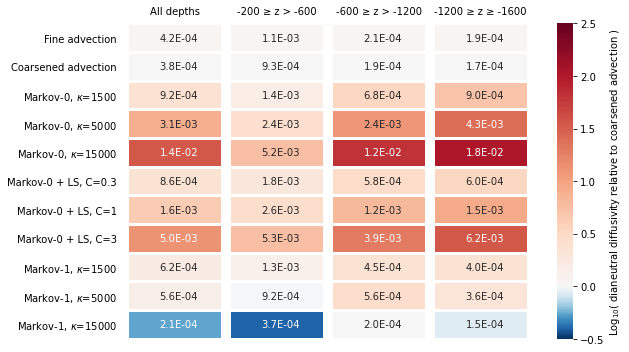

In [14]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.heatmap(df_coarsened_logtrans, 
                 linewidth=3,
                 fmt='.1E',
                 annot = df_coarsened.drop(r'Markov-0 M1, $\kappa$=15000').astype('float').to_numpy(),
                 cmap="RdBu_r", 
                 norm=colors.TwoSlopeNorm(vmin=-0.5, vcenter=0., vmax=2.5),
                 cbar=True,
                 cbar_kws={"label": r"Log$_{10}$( dianeutral diffusivity relative to coarsened advection )"},
                 annot_kws={"ha": 'left'})
ax.xaxis.set_ticks_position('top')
ax.tick_params(left=False, top=False)
for i in range(df_coarsened_logtrans.shape[1]+1):
    ax.axvline(i, color='white', lw=10)
for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.15, 0, matplotlib.transforms.IdentityTransform())
    t.set_transform(offs + trans)
plt.tight_layout()
plt.savefig("out/Diffusivity_table_coarsened.pdf",bbox_inches='tight')

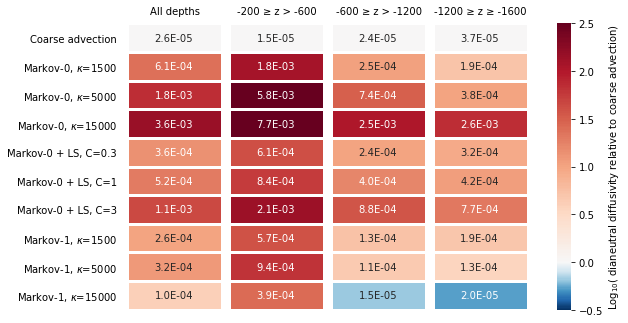

In [13]:
fig, ax = plt.subplots(figsize=(9, 4.6))
ax = sns.heatmap(df_coarse_logtrans, 
                 linewidth=3, 
                 annot=df_coarse.astype('float').to_numpy(), 
                 fmt='.1E', 
                 norm=colors.TwoSlopeNorm(vmin=-0.5, vcenter=0., vmax=2.5), 
                 cmap="RdBu_r",
                 cbar=True,
                 cbar_kws={"label": r"Log$_{10}$( dianeutral diffusivity relative to coarse advection)"},
                 annot_kws={"ha": 'left'})
ax.xaxis.set_ticks_position('top')
ax.tick_params(left=False, top=False)
for i in range(df_coarse.shape[1]+1):
    ax.axvline(i, color='white', lw=10)
for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.2, 0, matplotlib.transforms.IdentityTransform())
    t.set_transform(offs + trans)
plt.tight_layout()
plt.savefig("out/Diffusivity_table_coarse.pdf", bbox_inches='tight')